In [1]:
import numpy as np
import scipy.stats as stats
from matplotlib.pyplot import plot
import pandas as pd
import pylab
import statsmodels.api as sm
import seaborn as sns
import os
os.getcwd()

'C:\\Users\\sinem\\Desktop'

In [2]:
df=pd.read_excel('dt.xlsx')

In [3]:
df.info()
len(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


136

In [4]:
df.replace("?", np.nan, inplace=True)
df.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [5]:
df = df.drop(columns=['ind_420', 'ind_422', '90_target','20_target'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 132 entries, ind_5 to 50_target
dtypes: float64(86), int64(45), object(1)
memory usage: 6.2+ MB


In [7]:
df=df.dropna()
df.isnull().sum().sort_values(ascending=False)

50_target    0
ind_62       0
ind_43       0
ind_44       0
ind_45       0
            ..
ind_243      0
ind_309      0
ind_310      0
ind_311      0
ind_5        0
Length: 132, dtype: int64

In [8]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
df.describe().T


count       mean        std         min        25%        50%  \
ind_5      6167.0  -0.803146  23.624403 -131.000000 -14.000000   0.000000   
ind_6      6167.0  -0.803470  23.624144 -131.000000 -14.000000   0.000000   
ind_8      6167.0  48.388890  36.388526    0.000000  14.285714  50.000000   
ind_9      6167.0  48.289282  36.478009    0.000000  14.285714  50.000000   
ind_10     6167.0   0.099609  60.414625 -100.000000 -50.000000   0.000000   
...           ...        ...        ...         ...        ...        ...   
ind_418    6167.0 -28.166694  23.271524 -188.000000 -39.000000 -22.000000   
ind_424    6167.0   0.490297   0.425376    0.000000   0.000000   0.473684   
ind_426    6167.0   0.498188   0.228547    0.000000   0.323783   0.495192   
ind_428    6167.0   0.490174   0.150483    0.083530   0.379894   0.487078   
50_target  6167.0  -2.906358  34.559778  -37.142889 -36.208094 -34.267756   

                 75%         max  
ind_5      13.000000   76.000000  
ind_6      13.000000   76.000000  
ind_8      85.714286  100.000000  
ind_9      85.714286  100.000000  
ind_10     57.142857  100.000000  
...              ...         ...  
ind_418   -11.000000    0.000000  
ind_424     1.000000    1.000000  
ind_426     0.675730    1.000000  
ind_428     0.601508    0.868534  
50_target  35.879524   37.038694  

[131 rows x 8 columns]

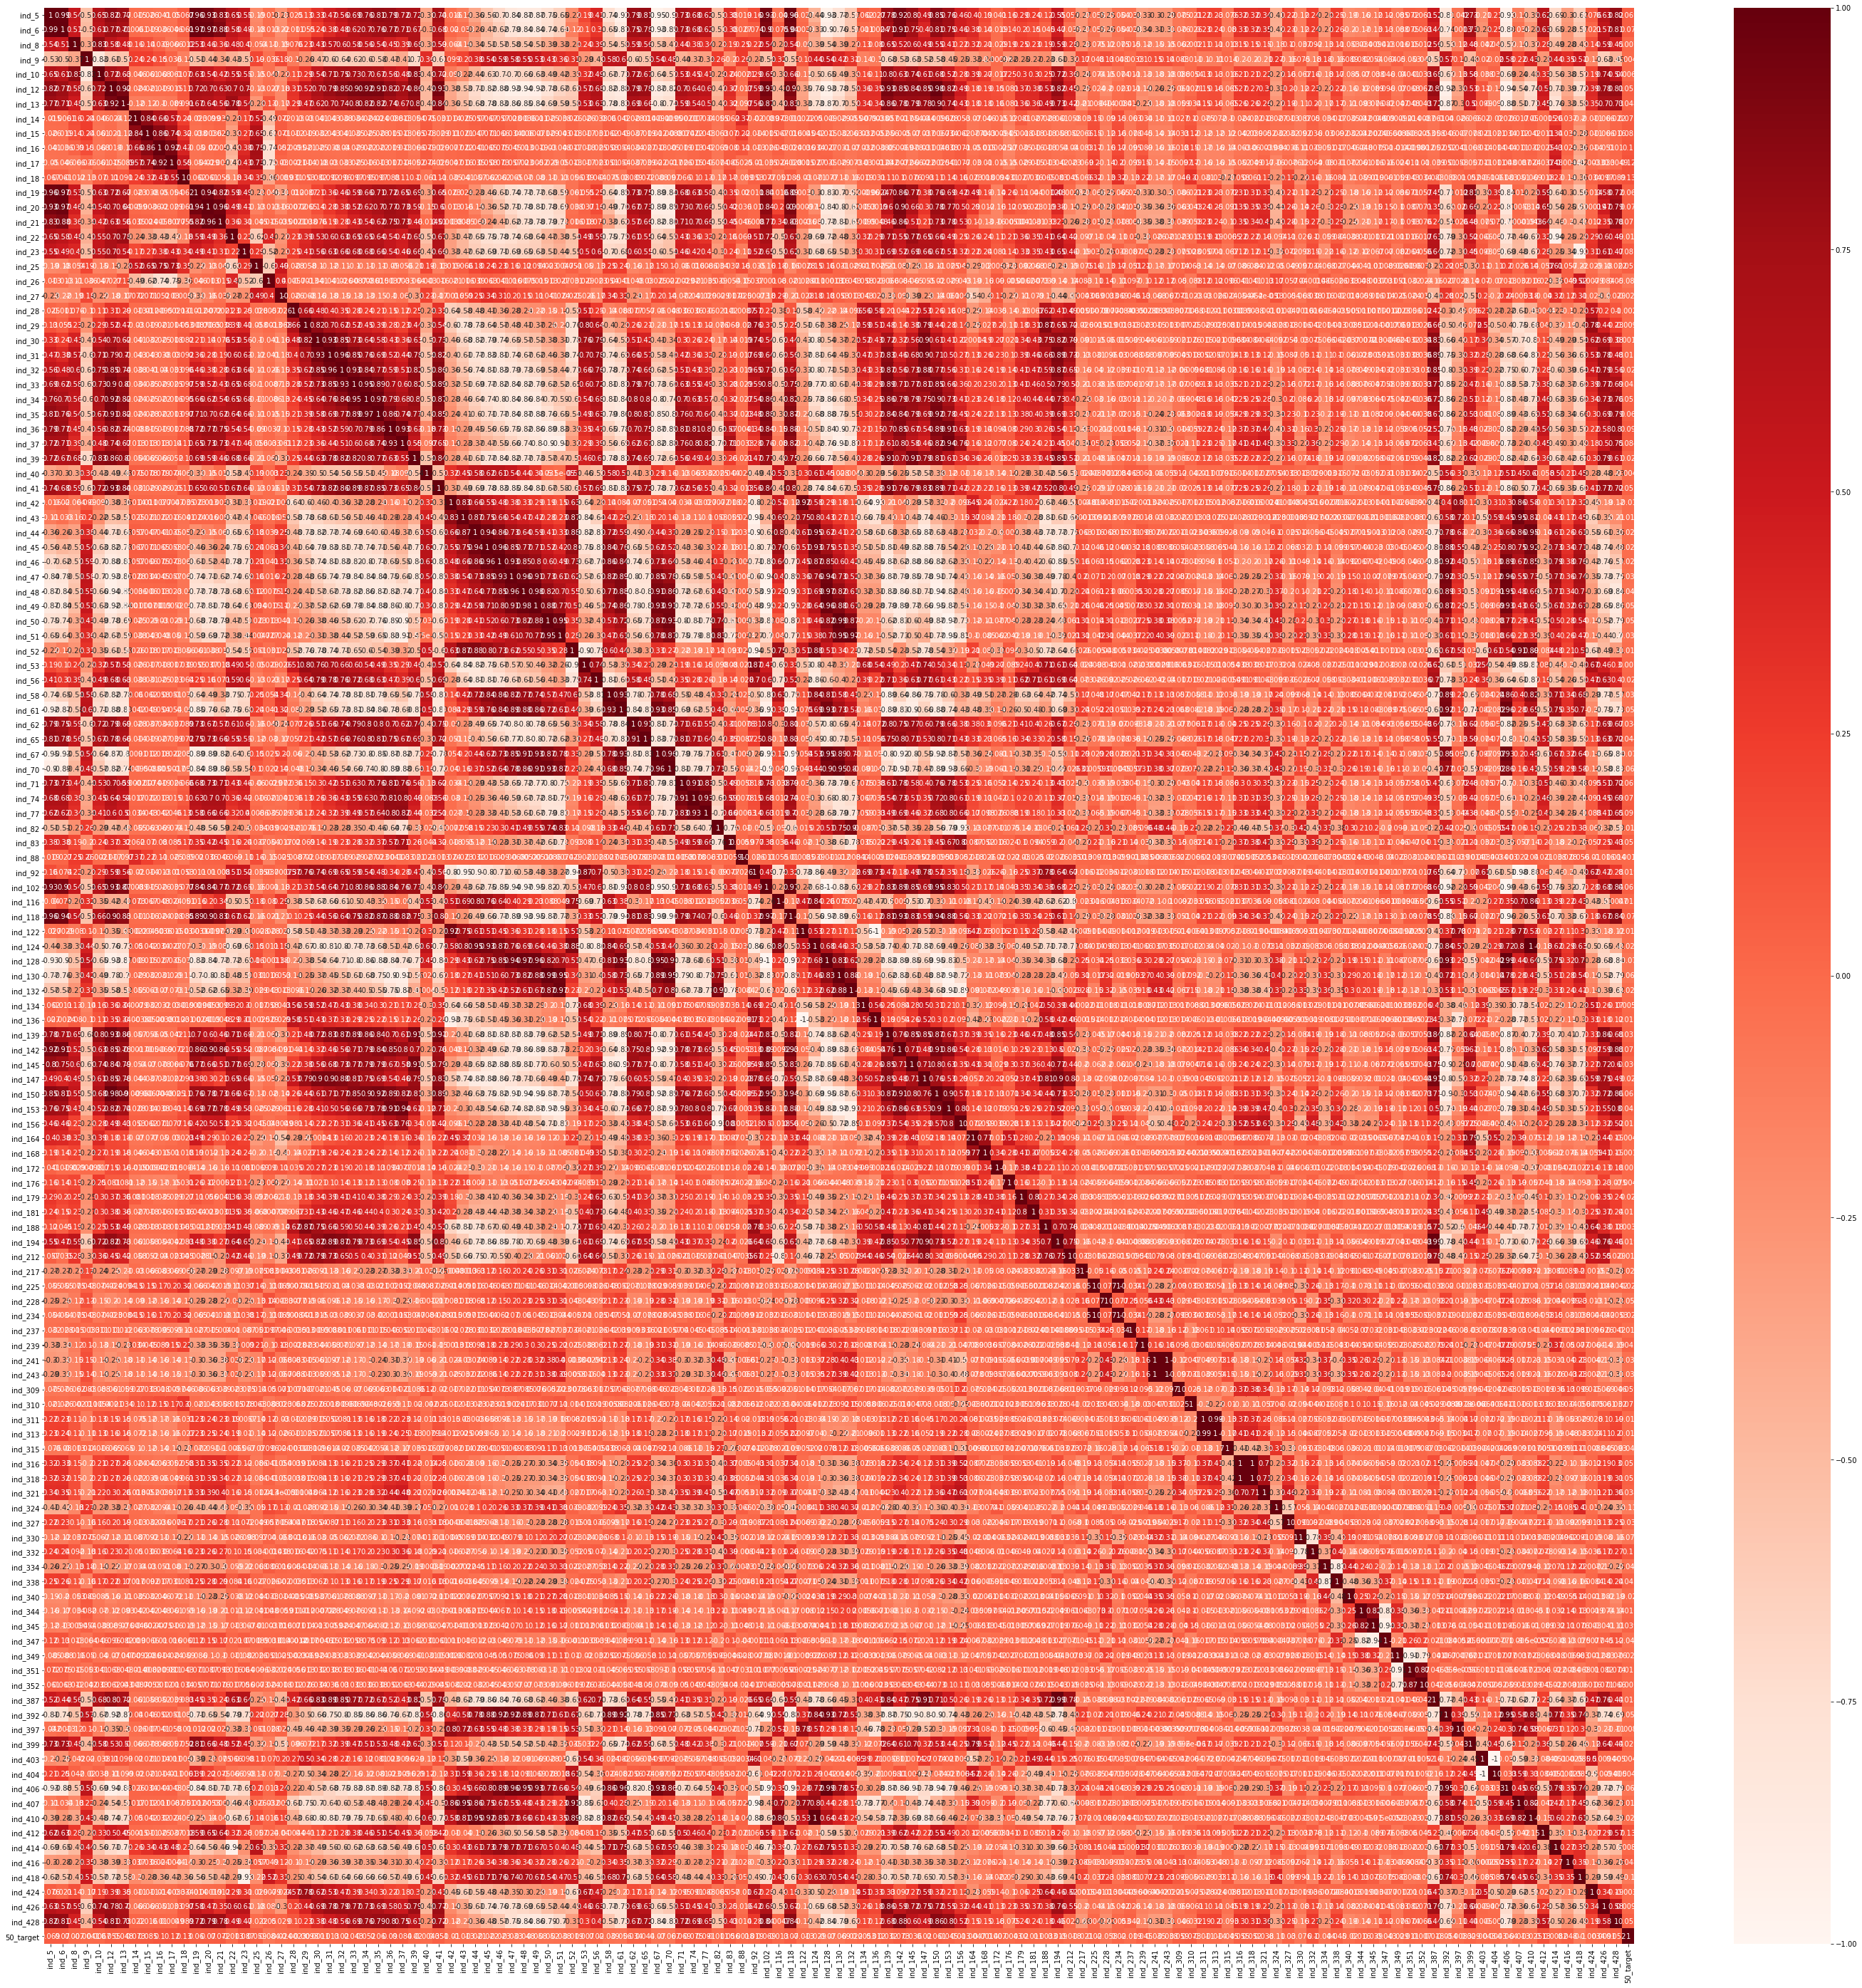

In [9]:
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(50,50))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
#Correlation with output variable
cor_target = abs(cor["50_target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features


ind_16       0.101774
ind_17       0.121097
ind_18       0.127057
ind_324      0.110802
ind_332      0.104057
ind_412      0.127234
ind_418      0.101488
50_target    1.000000
Name: 50_target, dtype: float64

In [11]:
df_corr = df.filter(["ind_16", "ind_17", "ind_18", "ind_324", "ind_332",  "ind_412", "ind_418", "50_target"], axis=1)

# REGRESSION

In [12]:
import numpy as np
import scipy.stats as stats
from matplotlib.pyplot import plot
import pandas as pd
import pylab
import statsmodels.api as sm 
import seaborn as sns

In [13]:
#I choose 50_target as my response. 
from sklearn.preprocessing import LabelEncoder   
dummy = pd.get_dummies(data["ind_109"])
df_dummy = pd.concat([df, dummy],axis=1)
df_dummy = df_dummy.drop(["ind_109"], axis=1)
df_dummy.head()
df = df_dummy

NameError: name 'data' is not defined

In [ ]:
sns.kdeplot(data["50_target"]) #has tree peaks,
stats.shapiro(data["50_target"]) #it is not normally distributed

In [ ]:

data_df = df.drop(["50_target"], axis=1)
data_df.hist(figsize=(26,18), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

In [ ]:
#Loading the dataset
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop("50_target",1)
X=sm.add_constant(X)    #Feature Matrix
y = df["50_target"]          #Target Variable
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.25 , random_state = 42, shuffle=False)


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
import statsmodels.api as sm
# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) # make the predictions by the model
# Print out the statistics
model.summary()

In [ ]:
#Loading the dataset
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_corr = df_corr.drop("50_target",1)
X_corr=sm.add_constant(x_corr)    #Feature Matrix
y_corr = df_corr["50_target"]          #Target Variable
X_train_corr, X_test_corr , y_train_corr , y_test_corr = train_test_split(X_corr, y_corr , test_size = 0.25 , random_state = 42)


In [ ]:
import statsmodels.api as sm
# Note the difference in argument order
model2 = sm.OLS(y_train_corr, X_train_corr).fit()
predictions = model2.predict(X_train_corr) # make the predictions by the model
# Print out the statistics
model2.summary()

In [ ]:
influence = model.get_influence()
influence

In [ ]:
resid_student = influence.resid_studentized_external

In [ ]:
(cooks, p) =influence.cooks_distance
(dffits,p) = influence.dffits
leverage = influence.hat_matrix_diag
print("Leverage vs studentized residuals")
sns.regplot(leverage , model.resid_pearson , fit_reg = False)


# PRINCIAPLE COMPONENT ANALYSIS


In [27]:
df2=df.copy()
df2 = df2.drop(columns=['20_target', '90_target'])
dummy = pd.get_dummies(df["ind_109"])
df2_dummy = pd.concat([df2, dummy],axis=1)
df2_dummy = df2_dummy.drop(["ind_109"], axis=1)
df2_dummy.head()
df2 = df2_dummy
y=df2["50_target"]
X=df2.drop(['50_target'], axis=1)

#Splitting data into test and train
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# Standardizing the features
from sklearn.preprocessing import StandardScaler as sc
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
np.cumsum(np.round(explained_variance, decimals=4)*100)[0:15]

In [ ]:
features=range(pca.n_components_)
plt.bar(features, explained_variance, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [ ]:
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [ ]:
import statsmodels.api as sm
lm = sm.OLS(y_train, np.asarray(X_train))
model = lm.fit()
model.summary()


# DECISION TREE

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [ ]:
cart_model = DecisionTreeRegressor()
?cart_model
cart_model.fit(X_train, y_train)

TAHMIN

In [ ]:
cart_model.predict(X_test)[0:5]

In [ ]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
from skompiler import skompile
print(skompile(cart_model.predict).to('python/code'))

MODEL TUNING

In [ ]:
cart_grdi = {"criterion" : ['mse', 'friedman_mse'],
           "min_samples_split": range(10,50),
               "min_samples_leaf": [10,15,20],
               "max_leaf_nodes": range(4,8)}
cart_cv = GridSearchCV(cart_model, cart_grdi, cv=10, n_jobs=-1, verbose=2)
cart_cv_model = cart_cv.fit(X_train,y_train)

In [ ]:
print("En iyi parametlerler: " + str(cart_cv_model.best_params_))

In [ ]:
cart = tree.DecisionTreeRegressor(criterion='friedman_mse',max_leaf_nodes=4,min_samples_leaf=20,min_samples_split=10)
cart_model = cart.fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
plt.figure(figsize=(15,20))
tree.plot_tree(cart_model);

# RANDOM FOREST

In [ ]:
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)

TAHMIN

In [ ]:
y_pred = rfr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

TUNING

In [ ]:
rfr_params = {"max_depth": list(range(1,5)),
              "max_features": [3,5,7,10,15,25],
              "n_estimators": [100,200,500,1000]}
rfr_model = RandomForestRegressor(random_state=0)

rfr_cv_model = GridSearchCV(rfr_model, 
                           rfr_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rfr_cv_model.fit(X_train, y_train)

In [ ]:
rfr_cv_model.best_params_

In [ ]:
rfr_tuned = RandomForestRegressor(max_depth=4,
                                  max_features=15,
                                  n_estimators=100)
rfr_tuned.fit(X_train, y_train)
y_pred = rfr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
importance = pd.DataFrame({"Importance": rfr_tuned.feature_importances_*100},index=X_train.columns)
importance.sort_values(by= "Importance", axis=0,ascending=False)[0:20].plot(kind="barh")

# NEURAL NETWORK

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
x_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(x_train_scaled, y_train)
mlp_model

In [ ]:
mlp_model.n_layers_

In [ ]:
mlp_model.hidden_layer_sizes

TAHMIN

In [ ]:
y_pred = mlp_model.predict(x_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

MODEL TUNING

In [ ]:
'''
mlp_param = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(10,10,10),
                                    (20,20), 
                                    (100,50,150), 
                                    (300,200,150),
                                    (3,5),
                                    (5,3)],
             "activation": ["relu","logistic"],
             "solver": ["lbfgs", "adam","sgd"]}
'''

mlp_param = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(20,20), (100,50,150), (300,200,150)],
             "activation": ["relu","logistic"]}

mlp_cv_model = GridSearchCV(mlp_model, mlp_param, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(X_train, y_train)

In [ ]:
mlp_cv_model.best_params_

In [ ]:
mlp_tuned = MLPRegressor(alpha= 0.1, hidden_layer_sizes=(300,200,150), activation="relu")
mlp_tuned.fit(x_train_scaled, y_train)

In [ ]:
y_pred = mlp_tuned.predict(x_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

# SVM(Support Vector Machine)


In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVR, LinearSVR
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import LinearSVR
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
svr_model = SVR('linear').fit(X_train, y_train)
svr_model.predict(X_train)[0:5]
print( 'y = {0} + {1}  x'.format(svr_mpdel.intercept_[0] ,
                                 svr_model.coef_[0][0]))


In [ ]:
X_train['Hits'][0:1]
y_pred = svr_model.predict(X_train)
plt.scatter(X_train , y_train)
plt.plot(X_train, y_pred, color = 'r')


In [ ]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred = lm_model.predict(X_train)
print('y = {0} + {1}  x'.format(lm_model.intercept_ , lm_model.coef_[0]))



In [ ]:
plt.scatter(X_train, y_train, alpha=0.5 , s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

In [ ]:
print( 'y = {0} + {1}  x'.format(svr_mpdel.intercept_[0] ,
                                 svr_model.coef_[0][0]))

In [ ]:
svr_model.predict([[91]])
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
svr_model

MODEL TUNING

In [ ]:
svr_params = {'C' : np.arange(0.1 , 2 , 0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10).fit(X_train, y_train)
pd.Series(svr_cv_model.best_params_)[0]
svr_tuned = SVR('linear', 
               C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)




In [ ]:
y_pred = svr_tuned.predict(X_test)

nq.sqrt(mean_squared_error(y_test, y_pred))
svr_rbf = SVR('rbf').fit(X_train, y_train)


In [ ]:
y_pred = svr_rbf.predict(X_test)
np.sqrt(mean_squared_error(y_test , y_pred))
svr_rbf

# Cat Boost

In [ ]:
catb = CatBoostRegressor()
catb.fit(X_train,y_train)
y_pred = catb.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
catb_grid = {"iterations": [100,500,1000],
            "learning_rate": [0.01,0.03,0.04],
            "depth": [3,4,5,]}

In [ ]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv= 10, n_jobs=-1, verbose=2)

catb_cv_model.fit(X_train, y_train)

# KNN

In [ ]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV
In [ ]: